In [188]:
#imports
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


In [123]:
# Creating dataframe
df = pd.ExcelFile('./datafile.xlsx')
df=pd.read_excel(df,'Insider')
df_daily = df.drop(columns =['Unnamed: 4','Year Month', 'Recirc Bullet Clicks.1',
              'Back to Homepage Button Clicks.1', 'Homepage Visits.1'])
df_monthly = df.drop(columns = ['Date', 'Recirc Bullet Clicks',
                     'Back to Homepage Button Clicks', 'Homepage Visits', 'Unnamed: 4'])

In [124]:
#checking my work
df_daily

,Date,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
0,2020-04-01,15357,11326,37184
1,2020-04-02,17261,10178,36676
2,2020-04-03,11996,9432,30394
3,2020-04-04,9618,9062,25388
4,2020-04-05,10658,8419,25901
...,...,...,...,...
297,2021-01-23,23273,14557,77399
298,2021-01-24,18199,15044,61215
299,2021-01-25,10946,9598,44788
300,2021-01-26,9543,9646,46710


In [125]:
#checking my work
df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,202004.0,305261.0,290745.0,914861.0
1,202005.0,313689.0,417543.0,1536865.0
2,202006.0,346646.0,416857.0,1551019.0
3,202007.0,322860.0,474440.0,1599465.0
4,202008.0,280056.0,344086.0,1424056.0
...,...,...,...,...
297,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN


In [180]:
df_monthly.describe()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
count,10.000000,10.000000,1.000000e+01
mean,279176.700000,336868.000000,1.342497e+06
std,45946.709741,76520.611518,2.076081e+05
min,220623.000000,232422.000000,9.148610e+05
25%,235067.250000,291869.750000,1.238175e+06
50%,292514.000000,315954.000000,1.353060e+06
75%,311582.000000,398664.250000,1.508663e+06
max,346646.000000,474440.000000,1.599465e+06


In [181]:
df_daily.describe()

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
count,302.000000,302.000000,302.000000
mean,9252.996689,11154.569536,44453.539735
std,3087.114086,3673.609460,11064.524617
min,4381.000000,9.000000,21053.000000
25%,7026.500000,9402.500000,36934.750000
50%,8554.500000,10749.000000,42599.500000
75%,10743.500000,12589.500000,49333.500000
max,23456.000000,37769.000000,92319.000000


# Time Series Data
#### Monthly

In [126]:
# removing NA Values
df_monthly.dropna(inplace=True)

In [127]:
# converting to datetime data type

df_monthly['Year Month'] = '2020/04','2020/05','2020/06','2020/07','2020/08','2020/09','2020/10','2020/11','2020/12','2021/01'

df_monthly['Year Month'] = pd.to_datetime(df_monthly['Year Month'],yearfirst=True)

df_monthly

,Year Month,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
0,2020-04-01,305261.0,290745.0,914861.0
1,2020-05-01,313689.0,417543.0,1536865.0
2,2020-06-01,346646.0,416857.0,1551019.0
3,2020-07-01,322860.0,474440.0,1599465.0
4,2020-08-01,280056.0,344086.0,1424056.0
5,2020-09-01,220623.0,232422.0,1179224.0
6,2020-10-01,236262.0,321762.0,1219671.0
7,2020-11-01,226729.0,310146.0,1294996.0
8,2020-12-01,234669.0,265435.0,1293688.0
9,2021-01-01,304972.0,295244.0,1411124.0


In [128]:
#converting date time to index + dropping extra column
df_monthly.index = df_monthly['Year Month']
df_monthly.drop(columns='Year Month')

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Year Month,,,
2020-04-01,305261.0,290745.0,914861.0
2020-05-01,313689.0,417543.0,1536865.0
2020-06-01,346646.0,416857.0,1551019.0
2020-07-01,322860.0,474440.0,1599465.0
2020-08-01,280056.0,344086.0,1424056.0
2020-09-01,220623.0,232422.0,1179224.0
2020-10-01,236262.0,321762.0,1219671.0
2020-11-01,226729.0,310146.0,1294996.0
2020-12-01,234669.0,265435.0,1293688.0


In [168]:
df_monthly.corr()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Recirc Bullet Clicks.1,1.000000,0.735239,0.491373
Back to Homepage Button Clicks.1,0.735239,1.000000,0.761189
Homepage Visits.1,0.491373,0.761189,1.000000


## Monthly - Plots

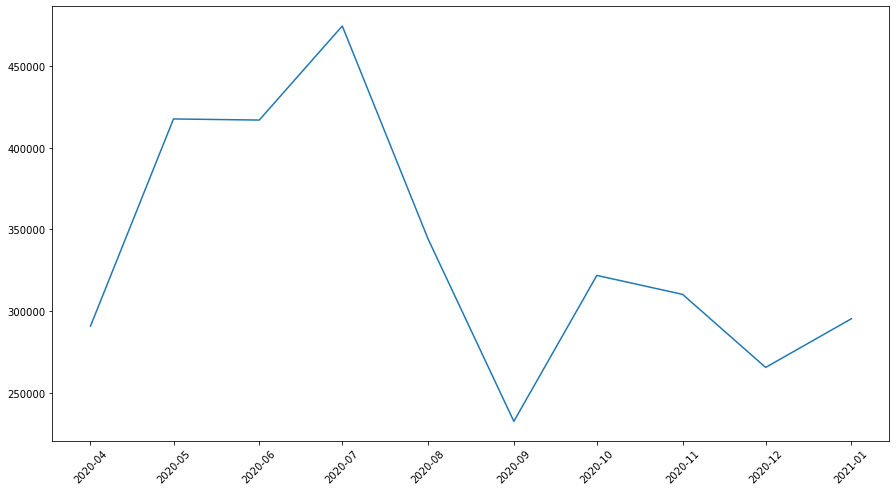

In [129]:
plt.figure(figsize = (15,8))
plt.plot(df_monthly['Back to Homepage Button Clicks.1'])
plt.xticks(rotation = 45);

In [130]:
#The Back to Homepage button usage fell drastically between July 2020 and September 2020

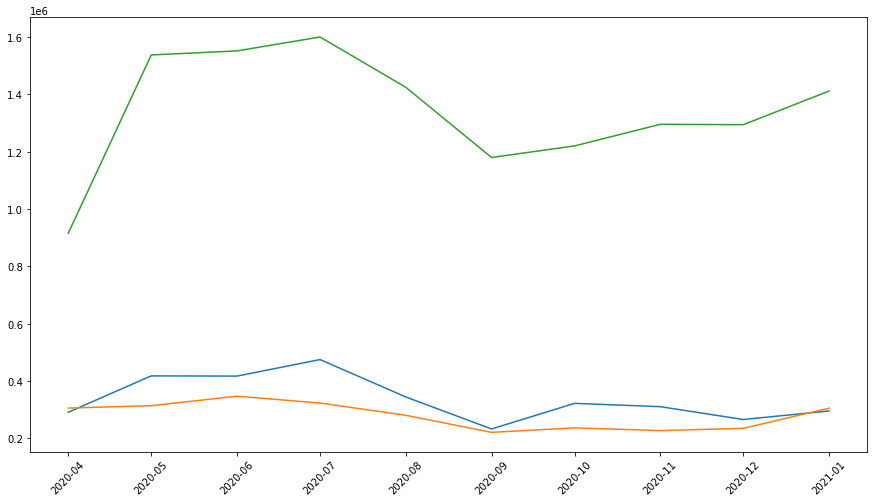

In [186]:
plt.figure(figsize = (15,8))
plt.plot(df_monthly[['Back to Homepage Button Clicks.1','Recirc Bullet Clicks.1','Homepage Visits.1']])
plt.xticks(rotation = 45);

In [132]:
#Homepage visits and back to home page clicks have similar patterns (understandably)

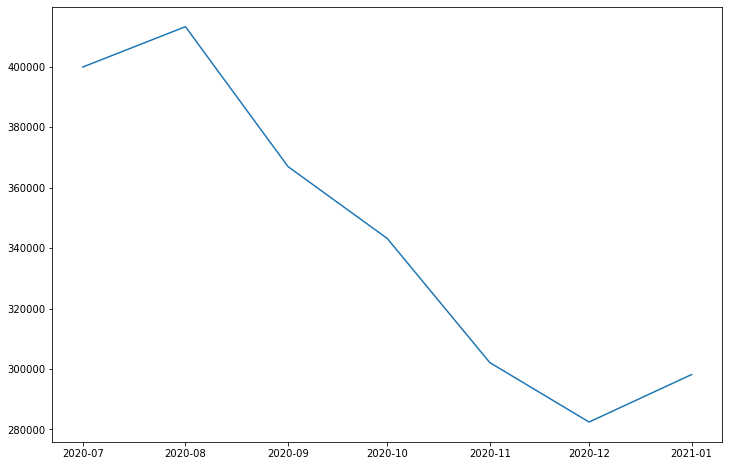

In [136]:
#Plot over time + rolling average (4 weeks)

plt.figure(figsize=(12,8))
plt.plot(df_monthly['Back to Homepage Button Clicks.1'].rolling(4).mean())

# Time Series Data
#### Daily

In [137]:
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily.index = df_daily['Date']
df_daily.drop(columns = 'Date', inplace=True)
df_daily

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
Date,,,
2020-04-01,15357,11326,37184
2020-04-02,17261,10178,36676
2020-04-03,11996,9432,30394
2020-04-04,9618,9062,25388
2020-04-05,10658,8419,25901
...,...,...,...
2021-01-23,23273,14557,77399
2021-01-24,18199,15044,61215
2021-01-25,10946,9598,44788


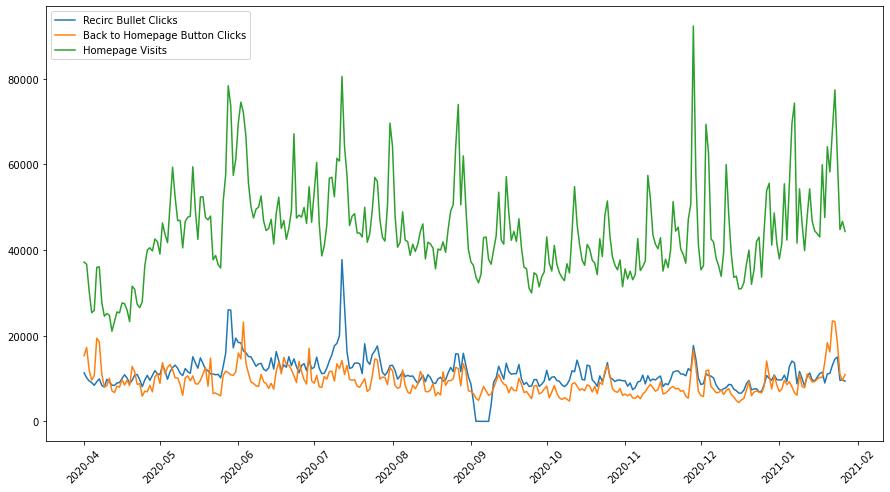

In [163]:
#plotting homepage button clicks
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']])
plt.legend(df_daily)
plt.xticks(rotation = 45);

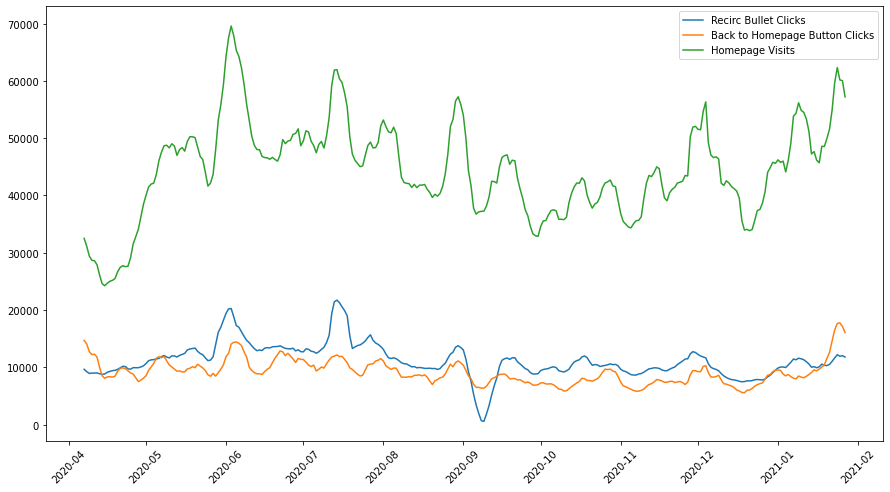

In [164]:
#plotting daily rolling average using 7 day lag
#this shows the average of every 7 days, aka a weekly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(7).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

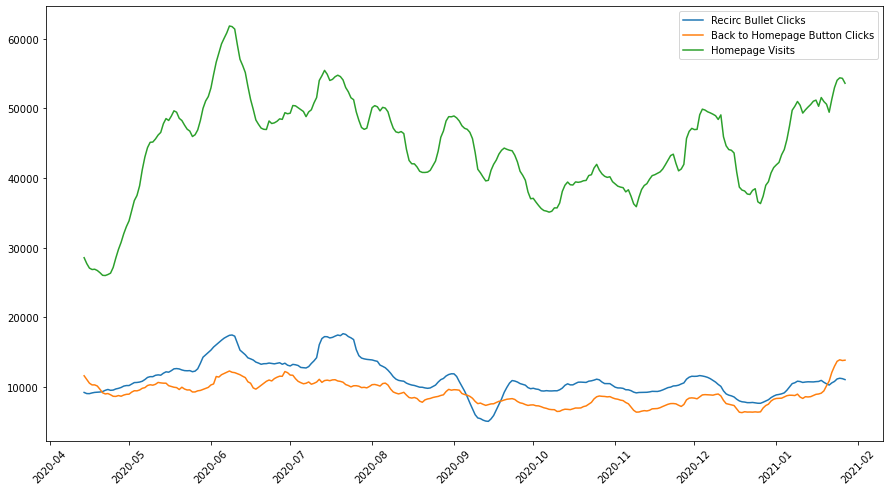

In [165]:
#plotting daily rolling average using 14 day lag
#this shows the average of every 14 days, aka a bi-weekly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(14).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

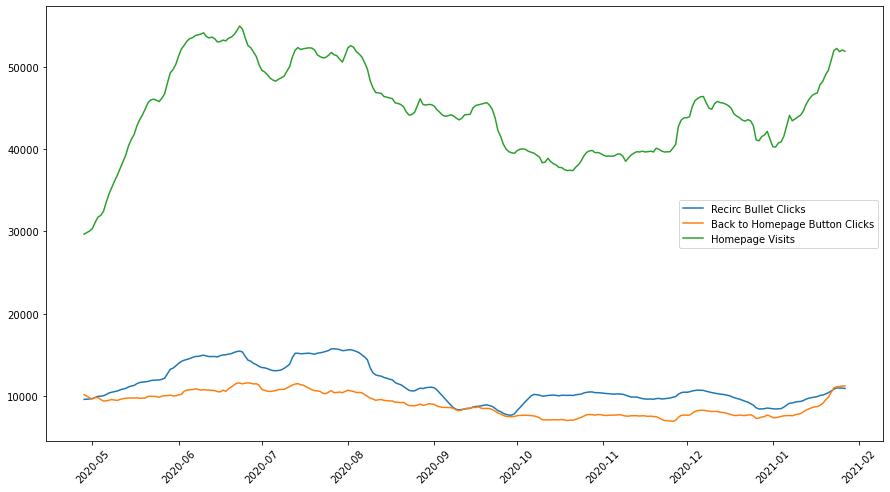

In [187]:
#plotting daily rolling average using 28 day lag
#this shows the average of every 28 days, aka a monthly average
plt.figure(figsize = (15,8))
plt.plot(df_daily[['Back to Homepage Button Clicks','Recirc Bullet Clicks','Homepage Visits']].rolling(28).mean())
plt.legend(df_daily)
plt.xticks(rotation = 45);

In [166]:
# Correlation Data

In [158]:
df_daily.corr()

,Recirc Bullet Clicks,Back to Homepage Button Clicks,Homepage Visits
Recirc Bullet Clicks,1.000000,0.490885,0.593370
Back to Homepage Button Clicks,0.490885,1.000000,0.691411
Homepage Visits,0.593370,0.691411,1.000000


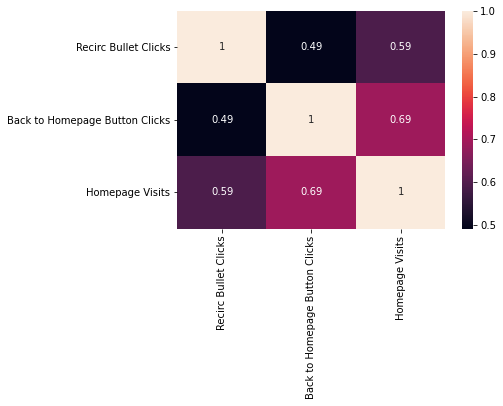

In [157]:
#finding correlation between the numbers
sns.heatmap(df_daily.corr(), annot=True);

In [195]:
df_monthly.corr()

,Recirc Bullet Clicks.1,Back to Homepage Button Clicks.1,Homepage Visits.1
Recirc Bullet Clicks.1,1.000000,0.735239,0.491373
Back to Homepage Button Clicks.1,0.735239,1.000000,0.761189
Homepage Visits.1,0.491373,0.761189,1.000000


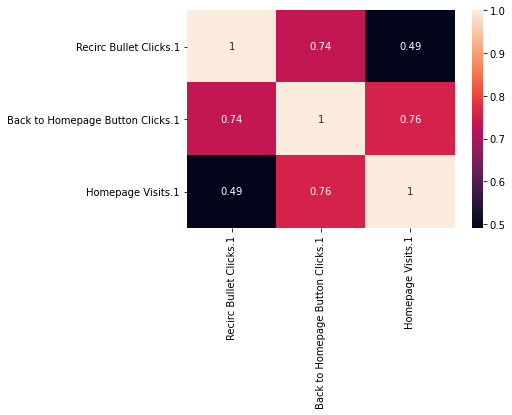

In [196]:
sns.heatmap(df_monthly.corr(), annot=True);

In [193]:
decomp = seasonal_decompose(df_daily['Homepage Visits'])

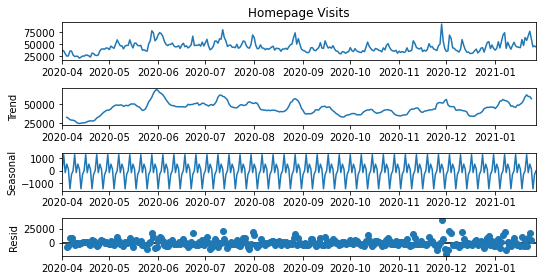

In [194]:
decomp.plot().set_figwidth(8);